In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [7]:
df['job_freq']=df['job_title'].replace(df['job_title'].value_counts(normalize=True))

In [10]:
df[['job_title','job_freq']][df['job_title']=='Actor']

,job_title,job_freq
0,Actor,0.048
7,Actor,0.048
24,Actor,0.048
25,Actor,0.048
50,Actor,0.048
...,...,...
14960,Actor,0.048
14964,Actor,0.048
14974,Actor,0.048
14976,Actor,0.048


In [5]:
df['job_title'].value_counts(normalize=True)

Student              0.088000
HomeMakers           0.064800
Singer               0.049600
Actor                0.048000
FilmMaker            0.047600
Dancer               0.046200
HouseKeeper          0.044467
Manager              0.040133
Police               0.027467
Photographer         0.026667
Beautician           0.025667
CEO                  0.025600
Engineer             0.024933
FashionDesigner      0.024733
Politician           0.024667
Accountant           0.024533
Clerks               0.024467
Architect            0.024333
ITProfessional       0.023200
DataScientist        0.022333
Lawyer               0.020600
Academician          0.020400
Doctor               0.019600
DefencePersonnels    0.019467
Technician           0.018867
Blogger              0.018733
Chef                 0.018733
FilmDirector         0.018733
Journalist           0.018333
CA                   0.018133
Farmer               0.017200
Analyst              0.017000
GovEmployee          0.016667
Buisnessma

In [3]:
df=pd.read_csv('healthinsurance.csv')

In [3]:
df.head(2)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [5]:
#  regular_ex, smoker, diabetes : convert to OBject
#  Which features are important
    #  Visualization
    #  Anova/ Chi-square Test
    #  Feature Selection :  SFS, RFE,  model.summary(), p<0.05
    #  Lasso(), reomove the unwanted features, by making beta coefficients zero


In [6]:
Null Values, Outliers, 
STandScaler
Train_test split
Model:  LinearRg(),   RMSE: Train and test, high difference,   Overfit()
        Lasso(), Rectify the problem overfiting,  Remove, by making beta coefficients zero

SyntaxError: invalid syntax (<ipython-input-6-60415f5baaa2>, line 1)

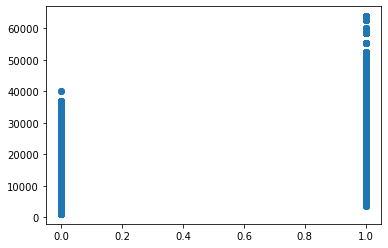

In [7]:
plt.scatter(df['smoker'],df['claim'])

In [8]:
df['smoker']=df['smoker'].astype('object')

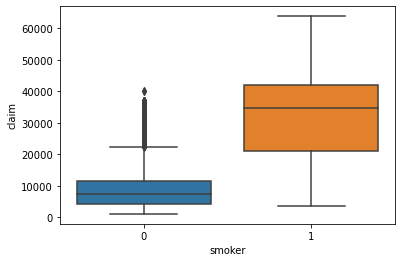

In [9]:
sns.boxplot(x=df['smoker'],y=df['claim'])

In [10]:
df['regular_ex']=df['regular_ex'].astype('object')
df['diabetes']=df['diabetes'].astype('object')
df['no_of_dependents']=df['no_of_dependents'].astype('object')

In [11]:
df['no_of_dependents'].unique()

array([1, 2, 0, 3, 4, 5], dtype=object)

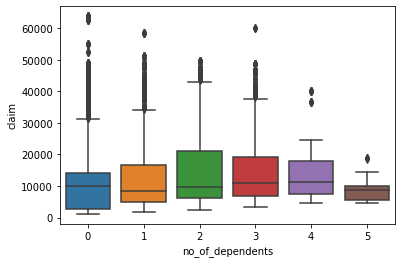

In [12]:
sns.boxplot(x=df['no_of_dependents'],y=df['claim'])

In [13]:
df.groupby(['no_of_dependents'])['claim'].median() #  

no_of_dependents
0     9866.3
1     8539.7
2     9630.4
3    11085.6
4    11299.3
5     8582.3
Name: claim, dtype: float64

In [14]:
df.isnull().sum()/len(df)*100

age                    2.640000
sex                    0.000000
weight                 0.000000
bmi                    6.373333
hereditary_diseases    0.000000
no_of_dependents       0.000000
smoker                 0.000000
city                   0.000000
bloodpressure          0.000000
diabetes               0.000000
regular_ex             0.000000
job_title              0.000000
claim                  0.000000
dtype: float64

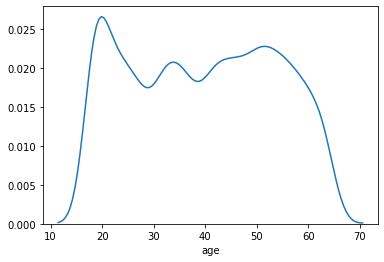

In [15]:
sns.distplot(df['age'],hist=False)

In [16]:
df['age'].skew()

0.005576775986078496

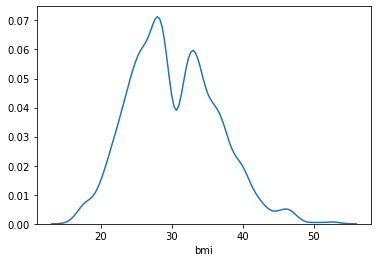

In [17]:
sns.distplot(df['bmi'],hist=False)

In [18]:
df['bmi'].skew()

0.3752585894901583

In [19]:
df['age']=df['age'].fillna(value=df['age'].mean())

In [20]:
df['bmi']=df['bmi'].fillna(value=df['bmi'].mean())

In [21]:
df.describe()

,age,weight,bmi,bloodpressure,claim
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,68.650133,13401.437620
std,13.829705,13.701935,5.924606,19.418515,12148.239619
min,18.000000,34.000000,16.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.900000,64.000000,4846.900000
50%,40.000000,63.000000,29.800000,71.000000,9545.650000
75%,51.000000,76.000000,34.100000,80.000000,16519.125000
max,64.000000,95.000000,53.100000,122.000000,63770.400000


In [22]:
df[df['bloodpressure']==0]

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
10,51.0,female,50,33.000000,EyeDisease,0,1,Syracuse,0,1,0,Police,44400.4
12,19.0,male,45,24.600000,NoDisease,1,0,York,0,0,1,Student,1837.2
15,56.0,male,67,40.300000,NoDisease,0,0,WashingtonDC,0,1,0,Engineer,10602.4
24,21.0,male,45,25.700000,NoDisease,4,1,Charlotte,0,1,0,Actor,17942.1
45,56.0,male,67,40.300000,NoDisease,0,0,IowaCity,0,1,0,Engineer,10602.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14851,20.0,male,60,29.700000,NoDisease,0,0,WashingtonDC,0,0,0,HouseKeeper,1769.5
14853,56.0,male,67,40.300000,NoDisease,0,0,Harrisburg,0,1,0,Engineer,10602.4
14934,51.0,male,59,31.600000,NoDisease,0,0,Oklahoma,0,1,0,GovEmployee,9174.1
14977,45.0,female,84,30.266413,NoDisease,1,1,Cambridge,0,1,1,ITProfessional,39725.5


In [23]:
df['bloodpressure']=df['bloodpressure'].replace(to_replace=0,value=df['bloodpressure'].median())

In [24]:
df.shape

(15000, 13)

In [190]:
756/15000

0.0504

In [40]:
df_wc=df.drop(['claim'],axis=1)

In [41]:
df_num=df_wc.select_dtypes(include=np.number)

In [42]:
df_cat=df_wc.select_dtypes(include=np.object)

In [43]:
df_num.head(2)

,age,weight,bmi,bloodpressure
0,60.0,64,24.3,72
1,49.0,75,22.6,78


In [44]:
df_cat.head(2)

,sex,hereditary_diseases,no_of_dependents,smoker,city,diabetes,regular_ex,job_title
0,male,NoDisease,1,0,NewYork,0,0,Actor
1,female,NoDisease,1,0,Boston,1,1,Engineer


In [47]:
df_cat['city'].nunique() # 91 dummy encoding, columns

91

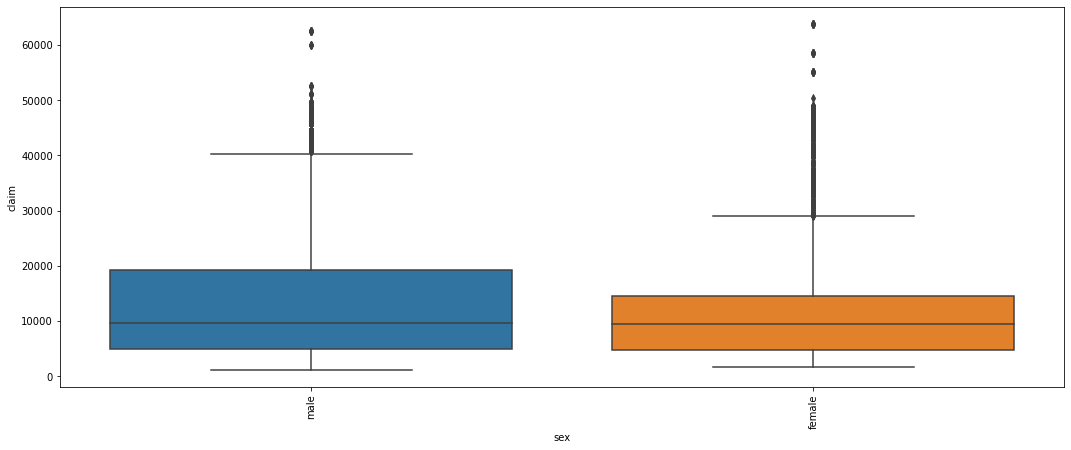

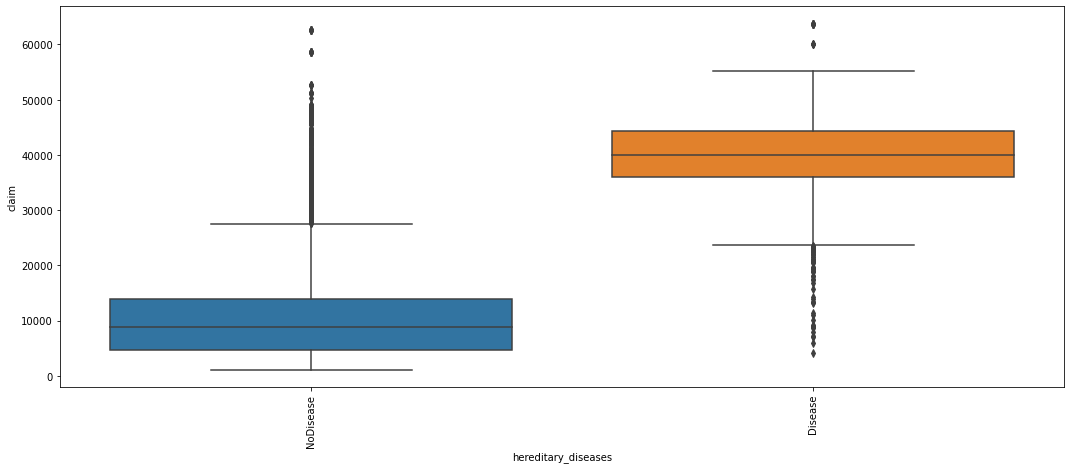

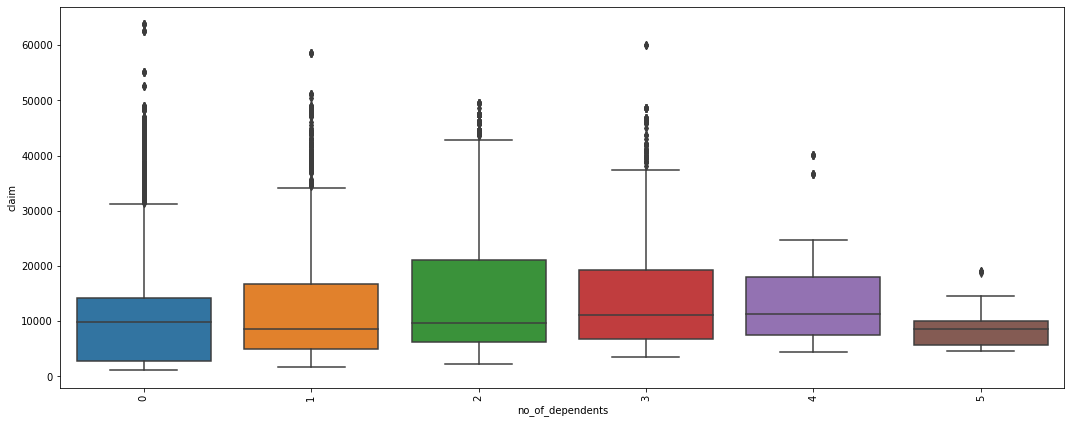

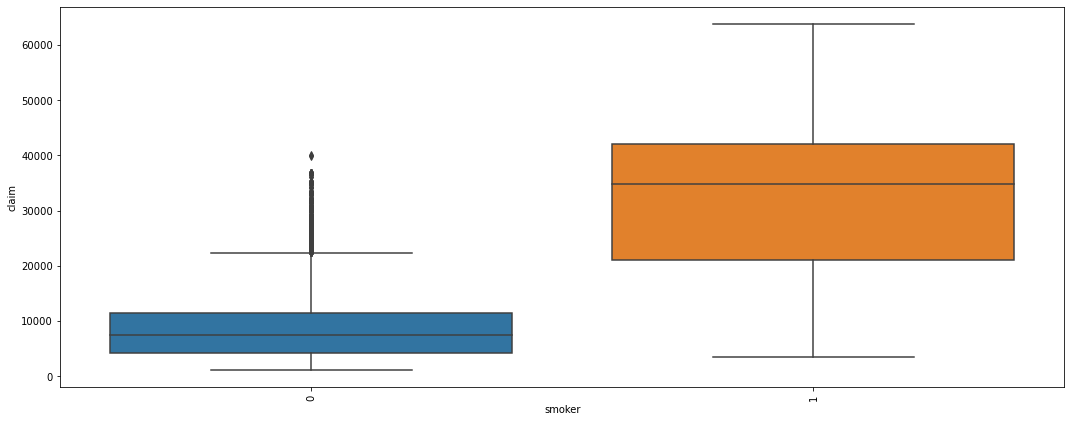

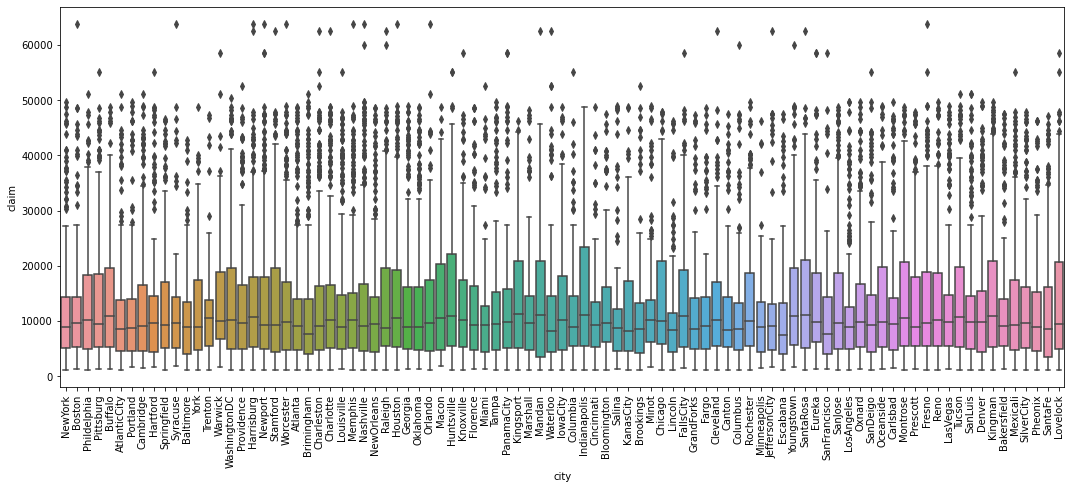

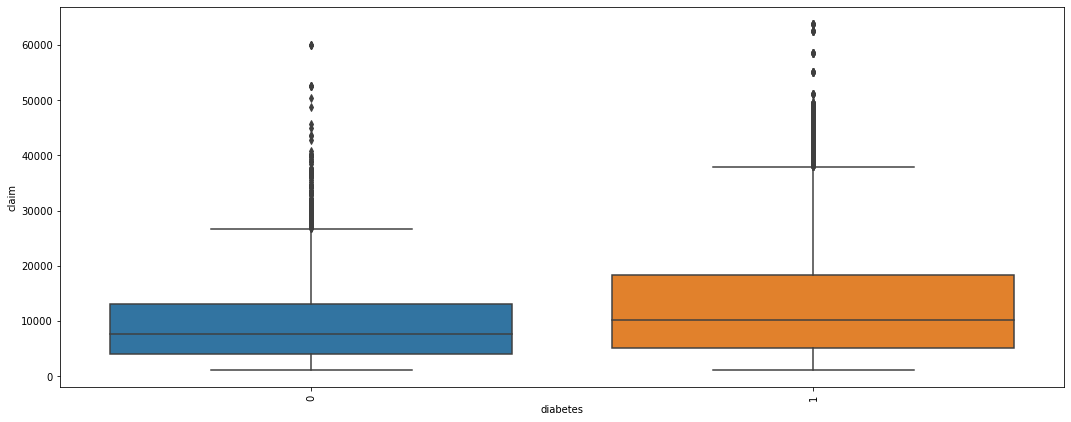

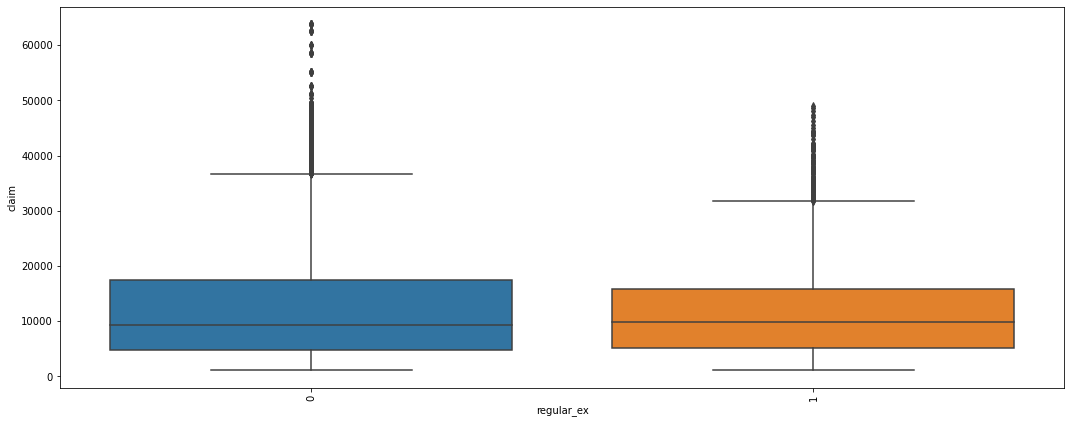

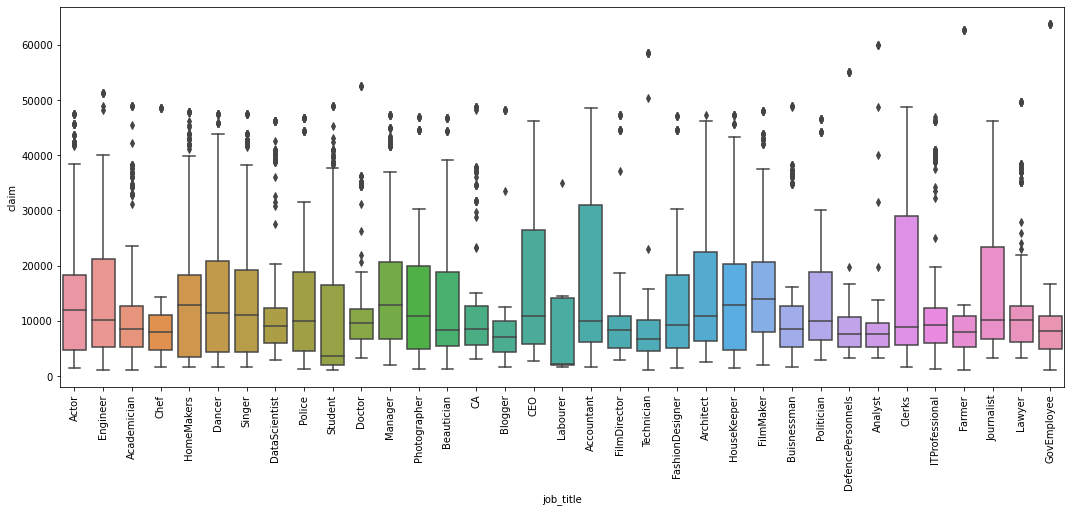

In [46]:
for i in df_cat.columns:
    plt.figure(figsize=(18,7))
    sns.boxplot(x=df_cat[i],y=df['claim'])
    plt.xticks(rotation=90)
    plt.show()
    # Is City an importan/singificant feature for my Target (CLaim)

In [33]:
df.columns

Index(['age', 'sex', 'weight', 'bmi', 'hereditary_diseases',
       'no_of_dependents', 'smoker', 'city', 'bloodpressure', 'diabetes',
       'regular_ex', 'job_title', 'claim'],
      dtype='object')

In [36]:
df.groupby(['hereditary_diseases'])['claim'].median()
#  NoDisease and Disease

hereditary_diseases
Alzheimer       38998.6
Arthritis       35595.6
Cancer          38746.4
Diabetes        39769.0
Epilepsy        42983.5
EyeDisease      42760.5
HeartDisease    40419.0
High BP         41661.6
NoDisease        8823.3
Obesity         42211.1
Name: claim, dtype: float64

In [49]:
df['city'].unique()

array(['NewYork', 'Boston', 'Phildelphia', 'Pittsburg', 'Buffalo',
       'AtlanticCity', 'Portland', 'Cambridge', 'Hartford', 'Springfield',
       'Syracuse', 'Baltimore', 'York', 'Trenton', 'Warwick',
       'WashingtonDC', 'Providence', 'Harrisburg', 'Newport', 'Stamford',
       'Worcester', 'Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
       'Louisville', 'Memphis', 'Nashville', 'NewOrleans', 'Raleigh',
       'Houston', 'Georgia', 'Oklahoma', 'Orlando', 'Macon', 'Huntsville',
       'Knoxville', 'Florence', 'Miami', 'Tampa', 'PanamaCity',
       'Kingsport', 'Marshall', 'Mandan', 'Waterloo', 'IowaCity',
       'Columbia', 'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
       'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
       'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 'Canton',
       'Columbus', 'Rochester', 'Minneapolis', 'JeffersonCity',
       'Escabana', 'Youngstown', 'SantaRosa', 'Eureka', 'SanFrancisco',
       'SanJose', 'LosAngeles', 'Ox

In [ ]:
df_city1=df[df['City']=='NewYork']['claim']
df_city2=df[df['City']=='SilverCity']['claim']

In [ ]:
91 groups, City1, city2

In [ ]:
f_oneway(df_city1,df_city2,df_city3...............,df_city91)

In [50]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [64]:
test=ols('claim ~ city',df).fit()
anova=anova_lm(test,typ=1)
anova
# City: p<0.05, reject Null
       # p>0.95, acceting NULL,  Means values of CLaim for all cities are same
        # City is not a siginificant Feature

,df,sum_sq,mean_sq,F,PR(>F)
city,90.0,1.626126e+10,1.806807e+08,1.225952,0.072408
Residual,14909.0,2.197287e+12,1.473799e+08,NaN,NaN


In [65]:
test=ols('claim ~ job_title',df).fit()
anova=anova_lm(test,typ=2)
anova

,sum_sq,df,F,PR(>F)
job_title,7.616065e+10,34.0,15.683579,3.223575e-89
Residual,2.137388e+12,14965.0,NaN,NaN


In [ ]:
'job_title' is important for Claim
"job_title" is significant for Claim

In [97]:
df['job_title'].value_counts()

Student              1320
HomeMakers            972
Singer                744
Actor                 720
FilmMaker             714
Dancer                693
HouseKeeper           667
Manager               602
Police                412
Photographer          400
Beautician            385
CEO                   384
Engineer              374
FashionDesigner       371
Politician            370
Accountant            368
Clerks                367
Architect             365
ITProfessional        348
DataScientist         335
Lawyer                309
Academician           306
Doctor                294
DefencePersonnels     292
Technician            283
Chef                  281
FilmDirector          281
Blogger               281
Journalist            275
CA                    272
Farmer                258
Analyst               255
GovEmployee           250
Buisnessman           242
Labourer              210
Name: job_title, dtype: int64

In [93]:
test=ols('claim ~ city',df).fit()
anova=anova_lm(test,typ=2)
anova

,sum_sq,df,F,PR(>F)
city,1.626126e+10,90.0,1.225952,0.072408
Residual,2.197287e+12,14909.0,NaN,NaN


In [94]:
test=ols('claim ~ city',df).fit()
anova=anova_lm(test,typ=3)
anova

,sum_sq,df,F,PR(>F)
Intercept,4.324490e+10,1.0,293.424673,3.745295e-65
city,1.626126e+10,90.0,1.225952,7.240839e-02
Residual,2.197287e+12,14909.0,NaN,NaN


In [ ]:
p <0.05, we reject NULL

p>0.05, accept NULL

NULL:  averages of claim for all the cities are same [No sig Difference]


In [230]:
df=df.drop(['city'],axis=1)

In [45]:
df.groupby(['hereditary_diseases'])['claim'].median()

hereditary_diseases
Alzheimer       38998.6
Arthritis       35595.6
Cancer          38746.4
Diabetes        39769.0
Epilepsy        42983.5
EyeDisease      42760.5
HeartDisease    40419.0
High BP         41661.6
NoDisease        8823.3
Obesity         42211.1
Name: claim, dtype: float64

In [47]:
df[df['hereditary_diseases']=='Arthritis']

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
37,19.0,male,48,25.100000,Arthritis,0,0,Florence,72,0,1,Accountant,14219.2
483,36.0,male,64,35.200000,Arthritis,1,1,Cleveland,71,1,0,Journalist,38709.2
597,34.0,male,79,30.266413,Arthritis,0,1,Memphis,70,1,0,Accountant,35491.6
665,19.0,female,47,29.000000,Arthritis,0,1,SilverCity,69,1,0,Accountant,20637.7
685,28.0,male,83,31.700000,Arthritis,0,1,Phildelphia,66,1,0,CA,34672.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14358,34.0,male,71,31.900000,Arthritis,1,1,Phildelphia,80,0,1,Student,37719.3
14395,22.0,female,43,29.400000,Arthritis,3,1,Tucson,68,1,0,Clerks,35595.6
14616,28.0,male,83,31.700000,Arthritis,0,1,Oklahoma,66,1,0,CA,34672.2
14931,18.0,male,51,26.400000,Arthritis,0,1,Raleigh,92,1,0,Student,36307.8


In [49]:
(96/15000)

0.0064

In [37]:
df['hereditary_diseases']=df['hereditary_diseases'].replace(to_replace=['Alzheimer',
'Arthritis',
'Cancer',
'Diabetes',
'Epilepsy', 
'EyeDisease',
'HeartDisease',
'High BP',
'Obesity'],value='Disease')

In [38]:
df['hereditary_diseases'].value_counts()

NoDisease    13998
Disease       1002
Name: hereditary_diseases, dtype: int64

In [ ]:
Sex is not a very significant Variable for CLaim, Not making difference in Claim values, [Male/Female]

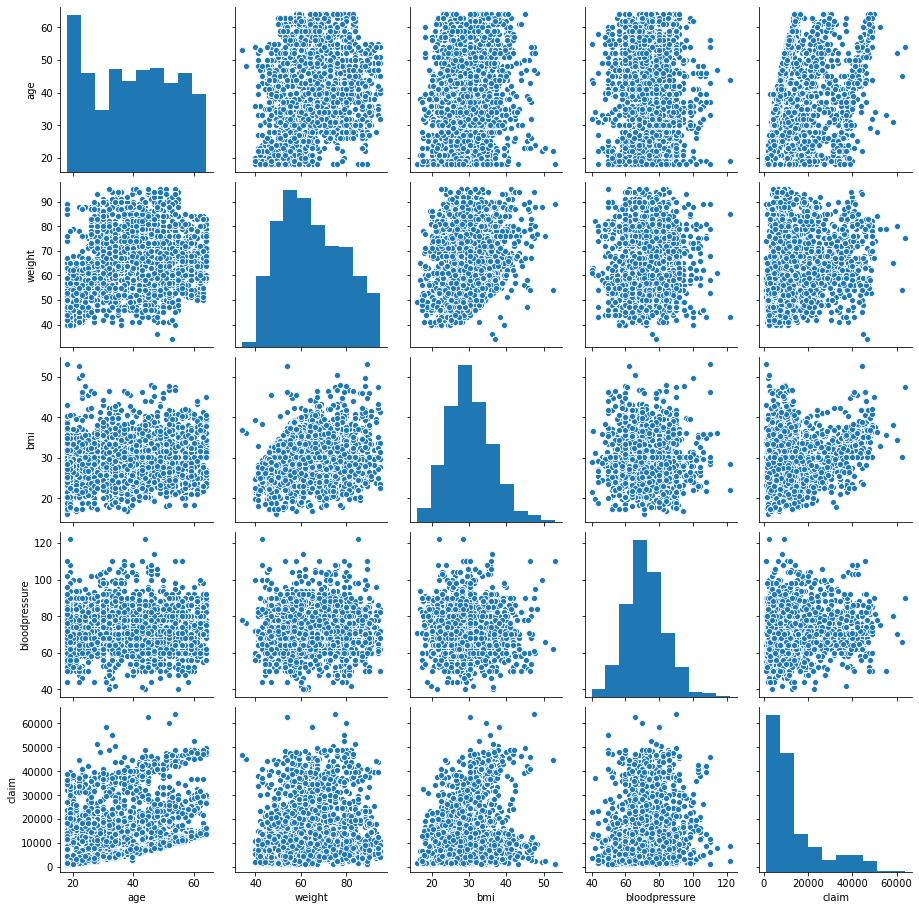

In [101]:
sns.pairplot(df_num)

In [102]:
df_num.corr()

,age,weight,bmi,bloodpressure,claim
age,1.000000,0.281228,0.180123,0.019223,0.298359
weight,0.281228,1.000000,0.243269,0.018094,0.077716
bmi,0.180123,0.243269,1.000000,-0.047979,0.197939
bloodpressure,0.019223,0.018094,-0.047979,1.000000,0.037676
claim,0.298359,0.077716,0.197939,0.037676,1.000000


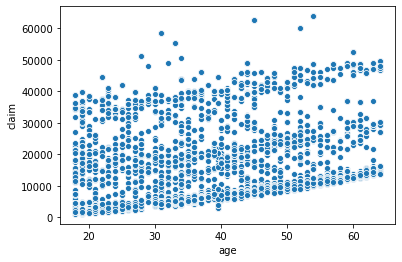

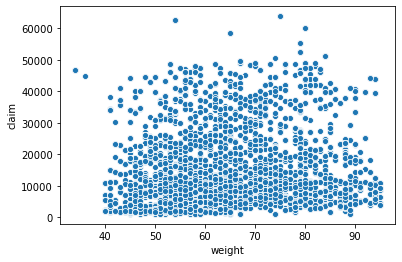

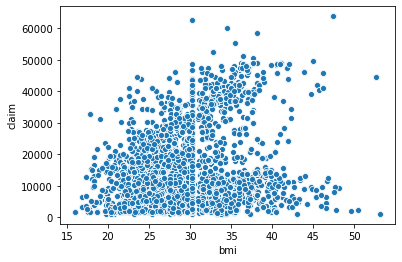

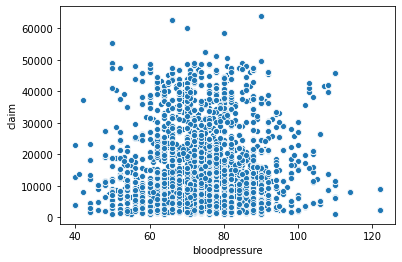

In [66]:
for i in df_num.columns:
    sns.scatterplot(df_num[i],df['claim'])
    plt.show()

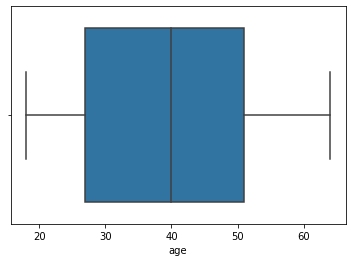

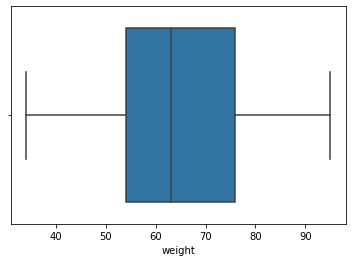

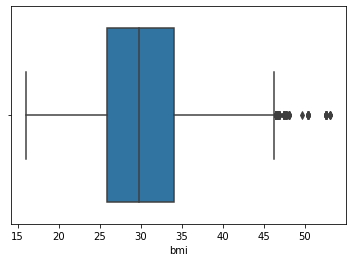

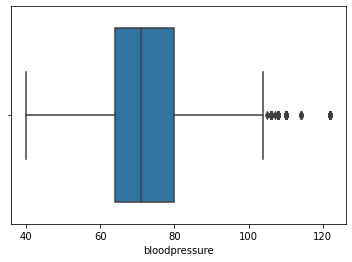

In [68]:
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.show()

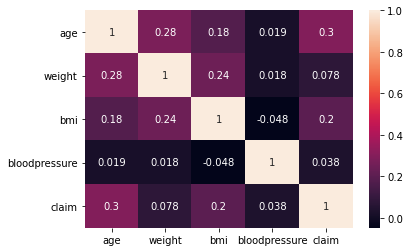

In [67]:
sns.heatmap(df.corr(),annot=True)

In [107]:
df_num.head(2)

,age,weight,bmi,bloodpressure
0,60.0,64,24.3,72
1,49.0,75,22.6,78


In [ ]:
# Outlier Treatment

In [164]:
Q1=df_num.quantile(0.25)
Q3=df_num.quantile(0.75)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
#outliers=df[df[((df<LB)|(df>UB))].any(axis=1)]

In [121]:
outliers

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
46,44.0,male,85,21.9,NoDisease,3,0,Columbia,122,1,0,Blogger,8891.1
55,36.0,male,89,29.7,NoDisease,0,0,Lincoln,106,0,0,FilmMaker,4399.7
64,52.0,female,76,46.8,NoDisease,5,0,JeffersonCity,70,1,0,Chef,12592.5
98,26.0,male,83,46.5,NoDisease,1,0,Brimingham,80,1,0,FilmDirector,2927.1
99,32.0,male,72,46.5,NoDisease,2,0,Charleston,54,1,0,Dancer,4686.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14788,22.0,male,54,52.6,HeartDisease,1,1,Cambridge,62,1,0,Photographer,44501.4
14808,23.0,male,76,50.4,NoDisease,1,0,Orlando,66,0,0,Student,2438.1
14887,52.0,male,80,47.7,NoDisease,1,0,Mandan,60,0,0,Politician,9748.9
14907,32.0,female,46,31.5,NoDisease,1,0,NewYork,106,1,1,Accountant,5148.6


In [236]:
df_outliers_rm=df[~df[((df<LB)|(df>UB))].any(axis=1)]

In [238]:
df_new=df_outliers_rm

In [239]:
len(df_new)

14723

In [167]:
df['bmi'].describe()

count    14856.000000
mean        30.093497
std          5.681532
min         16.000000
25%         25.900000
50%         29.800000
75%         33.900000
max         46.200000
Name: bmi, dtype: float64

In [ ]:
# Convert Categorical to Numerical

In [ ]:
BP: 0:  Replaced it with Median
Age and BMI : Repalced it with Mean/median
HD: two category
Job: Encoding  (ANOVA)
City: Removed (ANOVA)
Removed the outliers

In [69]:
df.head(2)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0


In [71]:
df=df.drop(['city'],axis=1)

In [72]:
df.head(2)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,78,1,1,Engineer,9567.0


In [73]:
df['job_title'].value_counts(normalize=True)

Student              0.088000
HomeMakers           0.064800
Singer               0.049600
Actor                0.048000
FilmMaker            0.047600
Dancer               0.046200
HouseKeeper          0.044467
Manager              0.040133
Police               0.027467
Photographer         0.026667
Beautician           0.025667
CEO                  0.025600
Engineer             0.024933
FashionDesigner      0.024733
Politician           0.024667
Accountant           0.024533
Clerks               0.024467
Architect            0.024333
ITProfessional       0.023200
DataScientist        0.022333
Lawyer               0.020600
Academician          0.020400
Doctor               0.019600
DefencePersonnels    0.019467
Technician           0.018867
Blogger              0.018733
FilmDirector         0.018733
Chef                 0.018733
Journalist           0.018333
CA                   0.018133
Farmer               0.017200
Analyst              0.017000
GovEmployee          0.016667
Buisnessma

In [ ]:
OLS, we can build, find the p_Values, whther that features is significant for my target or not

In [ ]:
OLS on City
91 catgegores (91 cities), get_dummies, LabelEncoder, Frequency,  91 additional columns, OLS
Apply, ANova,  City is a sign

Region,    Northeast:['','']
           Northwest: ['','']
           Southeast
           Southwest

In [77]:
df['job_title']=df['job_title'].replace(df['job_title'].value_counts(normalize=True))
# Frequency Encoder

In [78]:
df.columns

Index(['age', 'sex', 'weight', 'bmi', 'hereditary_diseases',
       'no_of_dependents', 'smoker', 'bloodpressure', 'diabetes', 'regular_ex',
       'job_title', 'claim'],
      dtype='object')

In [79]:
df['no_of_dependents']=df['no_of_dependents'].astype('int')
# Same as before, [like in original Dataset]

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  15000 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  15000 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int32  
 6   smoker               15000 non-null  object 
 7   bloodpressure        15000 non-null  int64  
 8   diabetes             15000 non-null  object 
 9   regular_ex           15000 non-null  object 
 10  job_title            15000 non-null  float64
 11  claim                15000 non-null  float64
dtypes: float64(4), int32(1), int64(2), object(5)
memory usage: 1.3+ MB


In [81]:
df=pd.get_dummies(df, drop_first=True)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            15000 non-null  float64
 1   weight                         15000 non-null  int64  
 2   bmi                            15000 non-null  float64
 3   no_of_dependents               15000 non-null  int32  
 4   bloodpressure                  15000 non-null  int64  
 5   job_title                      15000 non-null  float64
 6   claim                          15000 non-null  float64
 7   sex_male                       15000 non-null  uint8  
 8   hereditary_diseases_NoDisease  15000 non-null  uint8  
 9   smoker_1                       15000 non-null  uint8  
 10  diabetes_1                     15000 non-null  uint8  
 11  regular_ex_1                   15000 non-null  uint8  
dtypes: float64(4), int32(1), int64(2), uint8(5)
me

In [84]:
df.head(2)

,age,weight,bmi,no_of_dependents,bloodpressure,job_title,claim,sex_male,hereditary_diseases_NoDisease,smoker_1,diabetes_1,regular_ex_1
0,60.0,64,24.3,1,72,0.048000,13112.6,1,1,0,0,0
1,49.0,75,22.6,1,78,0.024933,9567.0,0,1,0,1,1


In [85]:
df.shape  #

(15000, 12)

In [104]:
X=df.drop(['claim'],axis=1)
y=df['claim']

In [105]:
Xc=sm.add_constant(X)
model_v1=sm.OLS(y,Xc).fit()
model_v1.summary()#  Outliers Removed Data

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     4347.
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:03:23   Log-Likelihood:            -1.5161e+05
No. Observations:               15000   AIC:                         3.032e+05
Df Residuals:                   14988   BIC:                         3.033e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          1882.1992    543.882      3.461      0.001     816.123    2948.275
age                             266.8215      3.766     70.851      0.000     259.440     274.203
weight                          -34.5929      3.891     -8.890      0.000     -42.220     -26.966
bmi                             205.2608      8.667     23.683      0.000     188.272     222.249
no_of_dependents                451.6992     40.119     11.259      0.000     373.062     530.337
bloodpressure                    27.5262      4.345      6.334      0.000      19.009      36.044
job_title                      6838.2815   2419.704      2.826      0.005    2095.366    1.16e+04
sex_male                        -89.3723     98.809     -0.904      0.366    -283.050     104.305
hereditary_diseases_NoDisease  -1.13e+04    227.097    -49.768      0.000   -1.17e+04   -1.09e+04
smoker_1                       2.007e+04    140.966    142.342      0.000    1.98e+04    2.03e+04
diabetes_1                     1350.3706    117.778     11.465      0.000    1119.512    1581.229
regular_ex_1                   -831.5706    117.272     -7.091      0.000   -1061.437    -601.704
==============================================================================
Omnibus:                     4467.189   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15843.080
Skew:                           1.479   Prob(JB):                         0.00
Kurtosis:                       7.074   Cond. No.                     5.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
df_cpy=df.copy()
df_cpy['claim']=np.log(df_cpy['claim'])

In [90]:
X=df_cpy.drop(['claim'],axis=1)
y=df_cpy['claim']
Xc=sm.add_constant(X)
model_v2=sm.OLS(y,Xc).fit()
model_v2.summary()#  Original Data 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     3889.
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:42:18   Log-Likelihood:                -9710.2
No. Observations:               15000   AIC:                         1.944e+04
Df Residuals:                   14988   BIC:                         1.954e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             7.5323      0.042    177.783      0.000       7.449       7.615
age                               0.0338      0.000    115.103      0.000       0.033       0.034
weight                        -9.131e-06      0.000     -0.030      0.976      -0.001       0.001
bmi                               0.0073      0.001     10.830      0.000       0.006       0.009
no_of_dependents                  0.0899      0.003     28.777      0.000       0.084       0.096
bloodpressure                     0.0014      0.000      4.239      0.000       0.001       0.002
job_title                        -0.4348      0.188     -2.307      0.021      -0.804      -0.065
sex_male                         -0.0753      0.008     -9.784      0.000      -0.090      -0.060
hereditary_diseases_NoDisease    -0.4830      0.018    -27.303      0.000      -0.518      -0.448
smoker_1                          1.3477      0.011    122.724      0.000       1.326       1.369
diabetes_1                        0.0707      0.009      7.701      0.000       0.053       0.089
regular_ex_1                      0.0195      0.009      2.131      0.033       0.002       0.037
==============================================================================
Omnibus:                     4569.052   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14992.094
Skew:                           1.548   Prob(JB):                         0.00
Kurtosis:                       6.795   Cond. No.                     5.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
df_cpy=df.copy()
df_cpy['bmi']=np.log(df_cpy['bmi'])

In [93]:
X=df_cpy.drop(['claim'],axis=1)
y=df_cpy['claim']
Xc=sm.add_constant(X)
model_v3=sm.OLS(y,Xc).fit()
model_v3.summary()#  Original Data 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     4351.
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:46:11   Log-Likelihood:            -1.5161e+05
No. Observations:               15000   AIC:                         3.032e+05
Df Residuals:                   14988   BIC:                         3.033e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -1.299e+04    986.636    -13.165      0.000   -1.49e+04   -1.11e+04
age                             265.8246      3.769     70.526      0.000     258.437     273.213
weight                          -34.2787      3.885     -8.823      0.000     -41.894     -26.663
bmi                            6225.5853    260.145     23.931      0.000    5715.669    6735.502
no_of_dependents                452.5819     40.103     11.286      0.000     373.976     531.188
bloodpressure                    27.7698      4.344      6.392      0.000      19.255      36.285
job_title                      6928.5772   2418.687      2.865      0.004    2187.655    1.17e+04
sex_male                        -90.0043     98.771     -0.911      0.362    -283.607     103.598
hereditary_diseases_NoDisease -1.132e+04    226.809    -49.924      0.000   -1.18e+04   -1.09e+04
smoker_1                       2.005e+04    140.872    142.352      0.000    1.98e+04    2.03e+04
diabetes_1                     1345.1224    117.742     11.424      0.000    1114.333    1575.912
regular_ex_1                   -842.5849    117.213     -7.188      0.000   -1072.338    -612.832
==============================================================================
Omnibus:                     4458.649   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15774.723
Skew:                           1.477   Prob(JB):                         0.00
Kurtosis:                       7.063   Cond. No.                     5.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
from scipy.stats import boxcox

In [97]:
df_cpy=df.copy()
df_cpy['bloodpressure'],lam=boxcox(df_cpy['bloodpressure'])

In [98]:
X=df_cpy.drop(['claim'],axis=1)
y=df_cpy['claim']
Xc=sm.add_constant(X)
model_v4=sm.OLS(y,Xc).fit()
model_v4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     4348.
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:50:29   Log-Likelihood:            -1.5161e+05
No. Observations:               15000   AIC:                         3.032e+05
Df Residuals:                   14988   BIC:                         3.033e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -325.1328    784.688     -0.414      0.679   -1863.218    1212.953
age                             266.7551      3.766     70.837      0.000     259.374     274.136
weight                          -34.6310      3.891     -8.901      0.000     -42.257     -27.005
bmi                             205.4045      8.666     23.701      0.000     188.417     222.392
no_of_dependents                451.3427     40.115     11.251      0.000     372.713     529.973
bloodpressure                   369.0173     56.240      6.561      0.000     258.780     479.254
job_title                      6841.4151   2419.463      2.828      0.005    2098.972    1.16e+04
sex_male                        -89.4866     98.799     -0.906      0.365    -283.145     104.172
hereditary_diseases_NoDisease  -1.13e+04    227.084    -49.754      0.000   -1.17e+04   -1.09e+04
smoker_1                       2.007e+04    140.955    142.363      0.000    1.98e+04    2.03e+04
diabetes_1                     1349.3746    117.766     11.458      0.000    1118.538    1580.211
regular_ex_1                   -834.5527    117.260     -7.117      0.000   -1064.397    -604.708
==============================================================================
Omnibus:                     4466.243   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15841.793
Skew:                           1.479   Prob(JB):                         0.00
Kurtosis:                       7.074   Cond. No.                     4.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [257]:
df_num=df.select_dtypes(include=np.number)
df_num.head(2)

,age,weight,bmi,no_of_dependents,bloodpressure,job_title,claim,sex_male,hereditary_diseases_NoDisease,smoker_1,diabetes_1,regular_ex_1
0,60.0,64,24.3,1,72,0.048000,13112.6,1,1,0,0,0
1,49.0,75,22.6,1,78,0.024933,9567.0,0,1,0,1,1


In [258]:
X.head(2)

,age,weight,bmi,no_of_dependents,bloodpressure,job_title,sex_male,hereditary_diseases_NoDisease,smoker_1,diabetes_1,regular_ex_1
0,60.0,64,24.3,1,4.276666,0.048000,1,1,0,0,0
1,49.0,75,22.6,1,4.356709,0.024933,0,1,0,1,1


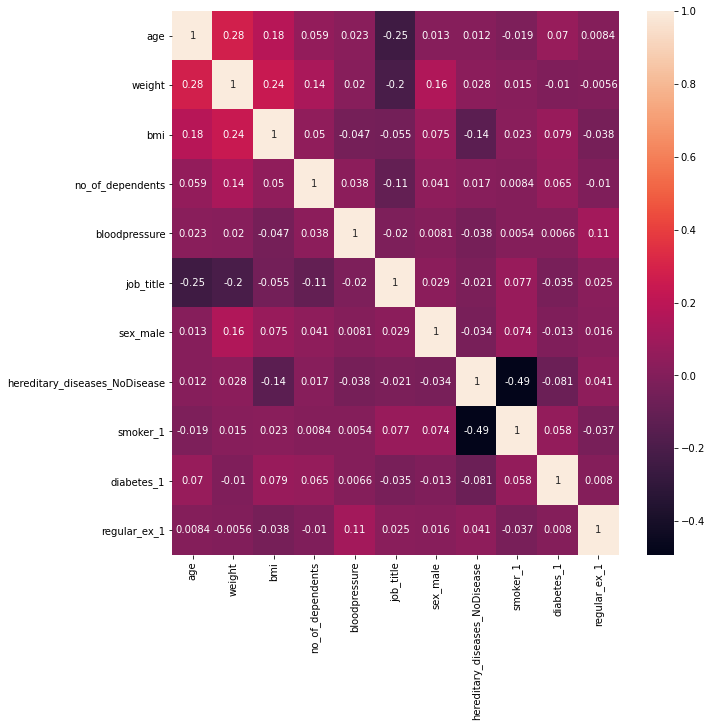

In [262]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),annot=True)

In [99]:
df_num.head(2)

,age,weight,bmi,bloodpressure
0,60.0,64,24.3,72
1,49.0,75,22.6,78


In [100]:
# Multicollinearity

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df_num.values,i) for i in range(df_num.shape[1])]
vif['Features']=df_num.columns
vif.sort_values(['VIF'],ascending=False)

,VIF,Features
1,23.629164,weight
2,22.931754,bmi
3,20.776178,bloodpressure
0,10.003008,age


In [102]:
df_cpy=df.copy()
df_cpy=df_cpy.drop(['weight'],axis=1)


In [103]:
X=df_cpy.drop(['claim'],axis=1)
y=df_cpy['claim']
Xc=sm.add_constant(X)
model_v5=sm.OLS(y,Xc).fit()
model_v5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     4749.
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:57:40   Log-Likelihood:            -1.5165e+05
No. Observations:               15000   AIC:                         3.033e+05
Df Residuals:                   14989   BIC:                         3.034e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           554.6194    524.341      1.058      0.290    -473.153    1582.392
age                             259.7187      3.690     70.388      0.000     252.486     266.951
bmi                             189.4501      8.505     22.276      0.000     172.780     206.120
no_of_dependents                415.8188     40.019     10.391      0.000     337.377     494.261
bloodpressure                    26.7152      4.356      6.133      0.000      18.177      35.253
job_title                      9962.4344   2400.275      4.151      0.000    5257.601    1.47e+04
sex_male                       -221.8220     97.933     -2.265      0.024    -413.783     -29.861
hereditary_diseases_NoDisease -1.145e+04    227.069    -50.429      0.000   -1.19e+04    -1.1e+04
smoker_1                           2e+04    141.135    141.702      0.000    1.97e+04    2.03e+04
diabetes_1                     1403.4499    117.932     11.901      0.000    1172.289    1634.611
regular_ex_1                   -830.8726    117.576     -7.067      0.000   -1061.337    -600.408
==============================================================================
Omnibus:                     4457.008   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15777.238
Skew:                           1.476   Prob(JB):                         0.00
Kurtosis:                       7.065   Cond. No.                     4.38e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Linearity
# Homoscadasticity

In [106]:
y_pred=model_v1.predict(Xc)

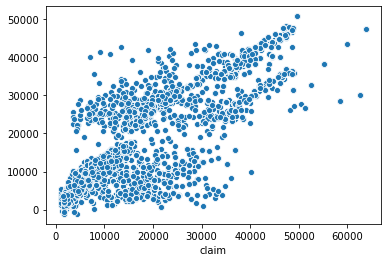

In [107]:
sns.scatterplot(y,y_pred)  # should have very high linearity

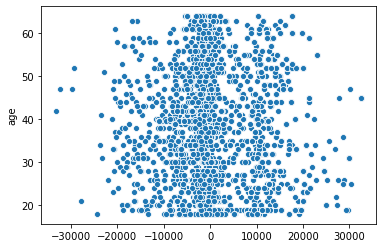

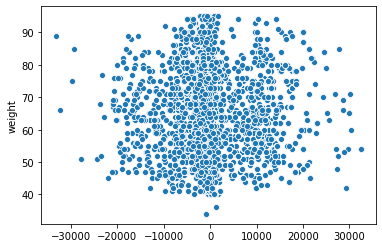

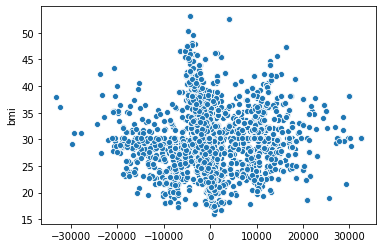

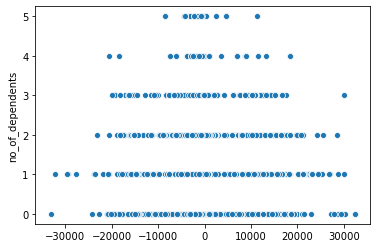

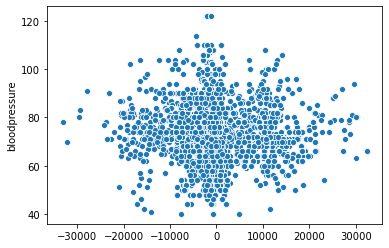

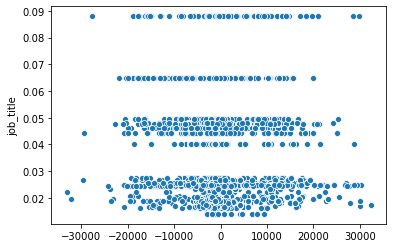

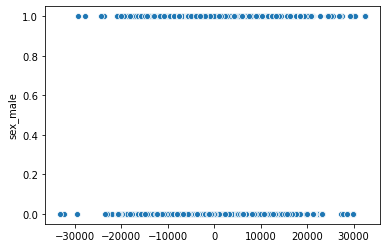

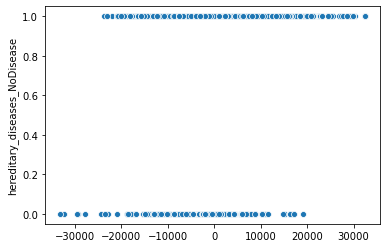

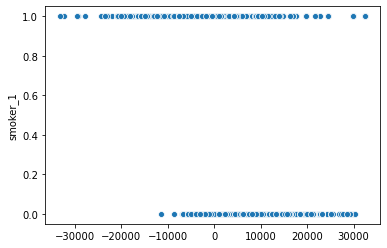

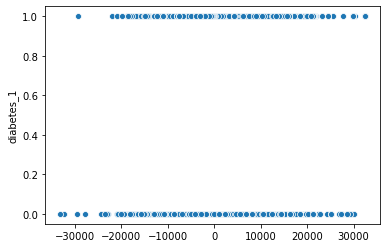

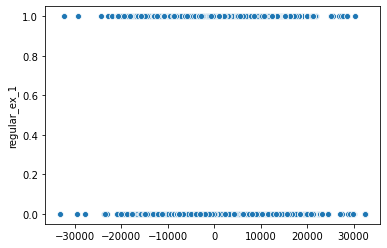

In [114]:
for i in X.columns:
    sns.scatterplot(model_v1.resid,X[i])
    plt.show()

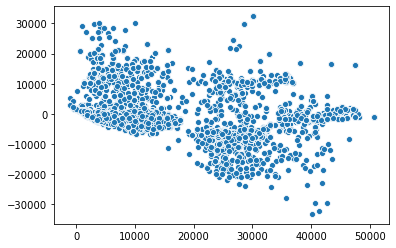

In [110]:
# Homoscadastic

sns.scatterplot(y_pred,model_v1.resid)

In [111]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [112]:
het_goldfeldquandt(y,Xc)# Homoscadstic

(0.9870486365862347, 0.7136233401596402, 'increasing')

In [ ]:
Normality (Skewness of Residuals(1.47)) not satisfied,but it's not reducing with any transformations, Can't help
Autocorrelation : 1.99 :  No autocorrelation :    Satisified
Multicollinearity, (corr): it should not be the problem, VIF, removal of weight also we tried, didn't work: Not Satisfied 
Linearity :  Exists : Satisfied
Homoscadasticity : Satisfied        

In [ ]:
# Train Test Split
#  Scale the Data
# Build linear Models

In [117]:
X=df.drop(['claim'],axis=1)
y=df['claim']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=131)

In [118]:
# Scaling
sc=StandardScaler()
X_train_scaled=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_scaled=pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [293]:
X_train_scaled.shape

(12000, 11)

In [294]:
X_test_scaled.shape

(3000, 11)

In [121]:
sfs_frwd=sfs(estimator=LinearRegression(),k_features='best',forward=True,cv=5,scoring='r2')

In [122]:
frwd_mod=sfs_frwd.fit(X_train_scaled,y_train)

In [123]:
frwd_mod.k_feature_names_  # Full Model Features

('age',
 'weight',
 'bmi',
 'no_of_dependents',
 'bloodpressure',
 'job_title',
 'sex_male',
 'hereditary_diseases_NoDisease',
 'smoker_1',
 'diabetes_1',
 'regular_ex_1')

In [124]:
def build_model(instance):
    model=instance.fit(X_train_scaled,y_train)
    print("Train R2",model.score(X_train_scaled,y_train))
    print("Test R2",model.score(X_test_scaled,y_test))
    print("Train RMSE",np.sqrt(mean_squared_error(y_train,model.predict(X_train_scaled))))
    print("Test RMSE",np.sqrt(mean_squared_error(y_test,model.predict(X_test_scaled))))

In [125]:
lin_reg=LinearRegression()

In [128]:
print("Results of Linear Regression :\n ")
build_model(lin_reg)

Results of Linear Regression :
 
Train R2 0.7629532276238407
Test R2 0.7546625313264125
Train RMSE 5910.358854863226
Test RMSE 6031.295789141943


In [129]:
sgd=SGDRegressor()

In [130]:
print("Results of SGD Regression :\n ")
build_model(sgd)

Results of SGD Regression :
 
Train R2 0.7628212853722354
Test R2 0.7544504594586497
Train RMSE 5912.003504066892
Test RMSE 6033.9019786487925


In [131]:
rid=Ridge()

In [132]:
print("Results of Ridge Regression :\n ")
build_model(rid)

Results of Ridge Regression :
 
Train R2 0.762953223631206
Test R2 0.7546630861433722
Train RMSE 5910.358904638009
Test RMSE 6031.288969419087


In [ ]:
OLS  exactly to Linear Regression [backend working are same]

Cost function:   (yact-ypred)^2 : SSE
                  (yact-B0+b1x)^2
        diff. wrt B0......equ1 =0  (Error =0)  , B0    ---
        diff wrt B1.....equ2 = 0  (Error =0), B1  ------

SGD has little different working

Cost function:   (yact-ypred)^2 : SSE
                  (yact-B0+b1x)^2
            starts with random values of Bo and B1
        diff. wrt B0......equ1 
        diff wrt B1.....equ2 

In [296]:
lin_reg=LinearRegression()
Lin_Model=lin_reg.fit(X_train_scaled,y_train)

In [301]:
print("R_square of Train",Lin_Model.score(X_train_scaled,y_train))
print("R_square of Test",Lin_Model.score(X_test_scaled,y_test))
y_pred_train=Lin_Model.predict(X_train_scaled)
print("RMSE of Train",np.sqrt(mean_squared_error(y_train,y_pred_train)))

y_pred_test=Lin_Model.predict(X_test_scaled)
print("RMSE of Test", np.sqrt(mean_squared_error(y_test,y_pred_test)))

R_square of Train 0.7629532276238407
R_square of Test 0.7546625313264125
RMSE of Train 5910.358854863226
RMSE of Test 6031.295789141943


In [ ]:
Claim : Predict
RMSE of Train: +-5910 ,  ............   35000, 30000, 40000
    6031                                        29000  41000

In [312]:
frd_sfs=sfs(estimator=LinearRegression(),forward=True,k_features=7,scoring='neg_mean_squared_error',cv=3)

In [313]:
sfs_fit=frd_sfs.fit(X_train_scaled,y_train)

In [314]:
sfs_fit.k_feature_names_

('age',
 'weight',
 'bmi',
 'no_of_dependents',
 'hereditary_diseases_NoDisease',
 'smoker_1',
 'diabetes_1')

In [306]:
X.shape

(15000, 11)

In [318]:
las=Lasso(alpha=0.01)

In [319]:
Las_Model=las.fit(X_train_scaled,y_train)

In [320]:
print("R_square of Train",Lin_Model.score(X_train_scaled,y_train))
print("R_square of Test",Lin_Model.score(X_test_scaled,y_test))
y_pred_train=Lin_Model.predict(X_train_scaled)
print("RMSE of Train",np.sqrt(mean_squared_error(y_train,y_pred_train)))

y_pred_test=Lin_Model.predict(X_test_scaled)
print("RMSE of Test", np.sqrt(mean_squared_error(y_test,y_pred_test)))

R_square of Train 0.7629532276238407
R_square of Test 0.7546625313264125
RMSE of Train 5910.358854863226
RMSE of Test 6031.295789141943


In [321]:
Las_Model.coef_

array([ 3697.9539958 ,  -467.17356367,  1183.89305031,   545.77707529,
         292.39310793,    97.82869772,   -57.44319738, -2815.71062513,
        7992.45739852,   543.98325387,  -318.15863858])

In [ ]:
# Crossvalscore
# Hyperparameter Tuning
# ElasticNet
#  SGD Regressor

In [341]:
sgd=SGDRegressor()
sgd_model=sgd.fit(X_train_scaled,y_train)

In [342]:
print("R_square of Train",sgd_model.score(X_train_scaled,y_train))
print("R_square of Test",sgd_model.score(X_test_scaled,y_test))
y_pred_train=sgd_model.predict(X_train_scaled)
print("RMSE of Train",np.sqrt(mean_squared_error(y_train,y_pred_train)))

y_pred_test=sgd_model.predict(X_test_scaled)
print("RMSE of Test", np.sqrt(mean_squared_error(y_test,y_pred_test)))

R_square of Train 0.762387762525488
R_square of Test 0.7545746287321534
RMSE of Train 5917.4041119673
RMSE of Test 6032.3761766369635


In [343]:
tuned_prm=[{'alpha':[0.001,0.005,0.01,0.1,0.2,0.5,0.8,1,2,3,4,5,6,7,8],
            'l1_ratio':[0.1,0.2,.04,0.01,0.8]}]

In [344]:
enet_grid=GridSearchCV(estimator=ElasticNet(),param_grid=tuned_prm,cv=3)
grid_cv_enet=enet_grid.fit(X_train_scaled,y_train)
grid_cv_enet.best_params_


{'alpha': 0.001, 'l1_ratio': 0.8}

In [345]:
els=ElasticNet(alpha=0.001 ,l1_ratio=0.8)

In [346]:
enet_Model=els.fit(X_train_scaled,y_train)

In [347]:
print("R_square of Train",enet_Model.score(X_train_scaled,y_train))
print("R_square of Test",enet_Model.score(X_test_scaled,y_test))
y_pred_train=enet_Model.predict(X_train_scaled)
print("RMSE of Train",np.sqrt(mean_squared_error(y_train,y_pred_train)))

y_pred_test=enet_Model.predict(X_test_scaled)
print("RMSE of Test", np.sqrt(mean_squared_error(y_test,y_pred_test)))

R_square of Train 0.76295320459859
R_square of Test 0.7546638429618051
RMSE of Train 5910.359141910988
RMSE of Test 6031.279666713443


In [324]:
rid=Ridge()

In [330]:
tuned_prm=[{'alpha':[0.001,0.005,0.01,0.1,0.2,0.5,0.8,1,2,3,4,5,6,7,8],
            'l1_ratio':[0.1,0.2,.04,0.01,0.8]}]

In [331]:
rid_grid=GridSearchCV(estimator=rid,param_grid=tuned_prm,cv=3)  # 45 times ridge is built

In [ ]:
12000,
Alpha=0.001
Cv=3
    4000     4000     4000      : R2:  recorded
Cv=1  Train   Train    Test
cv=2   Train    Test  Train      R2: record
       Test     Train    Train    R2:

In [332]:
X_train_scaled.shape

(12000, 11)

In [333]:
grid_cv_rid=rid_grid.fit(X_train_scaled,y_train)

In [334]:
grid_cv_rid.best_params_

{'alpha': 4}

In [335]:
rid=Ridge(alpha=4)

In [336]:
rid_Model=rid.fit(X_train_scaled,y_train)

In [337]:
print("R_square of Train",Lin_Model.score(X_train_scaled,y_train))
print("R_square of Test",Lin_Model.score(X_test_scaled,y_test))
y_pred_train=Lin_Model.predict(X_train_scaled)
print("RMSE of Train",np.sqrt(mean_squared_error(y_train,y_pred_train)))

y_pred_test=Lin_Model.predict(X_test_scaled)
print("RMSE of Test", np.sqrt(mean_squared_error(y_test,y_pred_test)))

R_square of Train 0.7629532276238407
R_square of Test 0.7546625313264125
RMSE of Train 5910.358854863226
RMSE of Test 6031.295789141943


In [ ]:
Effect of Data Transformation  : Model Building
Effect Scaling on Model Building
Value of RMSE what is idicates

scaling will be after ur transfromation
scaling, last step you perform, just before building model

In [ ]:
WHen do we apply transformation?

Outliers in your data, and don't want to : capping, or removal
Domain is not known
or they are extreme values
Transformation, r=won't remove,......Normalization, 
won't remove,   reeduce the skewness
Linear Regression:  Transformations:    Normality is not getting satisfied
        model.summary()
        
        skew:1.9
             2.04,
            0.9
            1.01
            
           -0.5         0.5
        
        R2, p_value, skew of residuals
        
Apply Transformation on Target
Build the model again, and check R2 and skew of Resids
                             increases      descreases           Keep that Trans
    
Apply Trans on Indepedent Features
15 :   
Having high skewness (dist plots)
check having p_Values, greater than 0.05,
Transform that variable

Build the model again, and check R2 and skew of Resids,  p_Value of that var
                             increases      descreases     reduece, accptance zone

In [ ]:
No effect of scaling on Linear Regression (OLS, sklearn.linearRegression : same results)


unless ur using SGDRegressor, Ridge or Lasso : Scaling is must
                iterations,  derivation of cost function wrt B0, B1, b2
        
        B0+B1X+B2*X2+.....
            -3 to +3

In [340]:
cross_val_score(estimator=LinearRegression(),X=X_train_scaled,y=y_train,cv=5 )

array([0.76127707, 0.77239873, 0.74810358, 0.75653069, 0.77416212])

In [ ]:
12000,
5 parts:   Trai  Train Train Train   Test
            Train  Train  Train Test   Train